In [491]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy import stats
from scipy.stats import iqr
import seaborn as sns

In [492]:
sp = pd.read_csv('/Users/alexandrperetokin/Downloads/fao.csv')#https://www.kaggle.com/dorbicycle/world-foodfeed-production

In [493]:
sp

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21472,ZWE,181,Zimbabwe,2948,Milk - Excluding Butter,5142,Food,1000 tonnes,-19.02,29.15,...,373.0,357.0,359.0,356.0,341.0,385.0,418.0,457.0,426,451
21473,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5521,Feed,1000 tonnes,-19.02,29.15,...,5.0,4.0,9.0,6.0,9.0,5.0,15.0,15.0,15,15
21474,ZWE,181,Zimbabwe,2960,"Fish, Seafood",5142,Food,1000 tonnes,-19.02,29.15,...,18.0,14.0,17.0,14.0,15.0,18.0,29.0,40.0,40,40
21475,ZWE,181,Zimbabwe,2961,"Aquatic Products, Other",5142,Food,1000 tonnes,-19.02,29.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


sp

In [494]:
sp['total'] = sp.T[10:-2].sum()#вводим сумму по странам

In [497]:
ag = sp.groupby(['Area', 'Element']).sum()#группировка по странам и виду производства 

,Area,Element,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total
0,Afghanistan,Feed,20,27169,55210,339.40,677.10,720.0,720.0,736.0,...,1184.0,1342.0,1392.0,1294.0,1616.0,1388.0,1192.0,1522,1536,38034.0
1,Afghanistan,Food,146,197526,375366,2477.62,4942.83,8761.0,8694.0,8458.0,...,16474.0,16975.0,17856.0,18087.0,19045.0,19642.0,19908.0,21184,21471,605415.0
2,Albania,Feed,75,67296,138025,1028.75,504.25,94.0,108.0,124.0,...,994.0,1047.0,959.0,1075.0,1134.0,1334.0,1334.0,1312,1319,27041.0
3,Albania,Food,294,264397,503916,4032.70,1976.66,1612.0,1641.0,1643.0,...,5725.0,5864.0,5785.0,6093.0,6182.0,6573.0,6780.0,6909,6952,193669.0
4,Algeria,Feed,88,58945,121462,616.66,36.52,83.0,94.0,63.0,...,4401.0,4599.0,4252.0,3436.0,4839.0,5804.0,7477.0,8549,8706,112193.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,Yemen,Food,26394,285091,545052,1648.30,5143.12,2815.0,2870.0,2975.0,...,13898.0,14633.0,15655.0,15985.0,16657.0,16682.0,16744.0,17929,18325,412185.0
344,Zambia,Feed,3263,35741,71773,-170.69,362.05,90.0,90.0,70.0,...,70.0,89.0,76.0,94.0,228.0,388.0,568.0,652,816,5316.0
345,Zambia,Food,26857,287221,550194,-1404.91,2979.95,2886.0,2967.0,2999.0,...,7877.0,8188.0,8113.0,8518.0,8984.0,9399.0,9495.0,9859,10180,288864.0
346,Zimbabwe,Feed,2353,35047,71773,-247.26,378.95,180.0,216.0,190.0,...,251.0,292.0,230.0,249.0,218.0,238.0,225.0,254,262,24948.0


In [498]:
ag = ag.reset_index(level=['Area', 'Element'])#делаем из индексов,столбцы для дальнейшено анализа

In [499]:
ag.to_excel("feed.xlsx")#Проверка

In [614]:
a = ag.iloc[0::2]#разделяем виды производства

In [621]:
a

,Area,Element,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,...,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total,index
1,Afghanistan,Feed,20,27169,55210,339.40,677.10,720.0,720.0,736.0,...,1342.0,1392.0,1294.0,1616.0,1388.0,1192.0,1522,1536,38034.0,0
2,Albania,Feed,75,67296,138025,1028.75,504.25,94.0,108.0,124.0,...,1047.0,959.0,1075.0,1134.0,1334.0,1334.0,1312,1319,27041.0,2
3,Algeria,Feed,88,58945,121462,616.66,36.52,83.0,94.0,63.0,...,4599.0,4252.0,3436.0,4839.0,5804.0,7477.0,8549,8706,112193.0,4
4,Angola,Feed,105,41346,82815,-168.00,268.05,118.0,118.0,116.0,...,10004.0,10112.0,10274.0,12520.0,12408.0,13118.0,10096,18518,114884.0,6
5,Antigua and Barbuda,Feed,104,35632,71773,221.78,-803.40,2.0,2.0,2.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0,0,26.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Venezuela (Bolivarian Republic of),Feed,5192,59274,121462,141.24,-1464.98,360.0,291.0,321.0,...,2580.0,4006.0,4240.0,4127.0,4177.0,4042.0,4647,5756,113987.0,338
171,Viet Nam,Feed,3792,43428,88336,224.96,1732.48,2104.0,2512.0,2614.0,...,21500.0,21892.0,20362.0,20612.0,23026.0,21533.0,22210,22712,423004.0,340
172,Yemen,Feed,3237,34896,71773,202.15,630.76,167.0,168.0,172.0,...,219.0,409.0,216.0,470.0,326.0,346.0,442,420,10484.0,342
173,Zambia,Feed,3263,35741,71773,-170.69,362.05,90.0,90.0,70.0,...,89.0,76.0,94.0,228.0,388.0,568.0,652,816,5316.0,344


In [623]:
a['index'] = a.index##создаем дополнительные индексы в виде столбца, чтобы индексы не сбивались в процессе анализа


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [625]:
b = ag.iloc[1::2]# создаем переменную, которая связана с производством продовольствия для людей.

In [626]:
b['index'] = b.index

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [509]:
np.corrcoef(b['total'],a['total'])#смотрим наличеие корреляции 

array([[1.        , 0.83792867],
       [0.83792867, 1.        ]])

In [510]:
scipy.stats.pearsonr(b['total'],a['total'])#Смотрим наличие корреляции и значимость
#Модель значима, кэффициент 0,84 говорит о наличии сильной связи 

(0.8379286724703692, 4.229425597432482e-47)

Text(0.5, 0.98, 'Взаимосвязь количества корма и количества продовольствия')

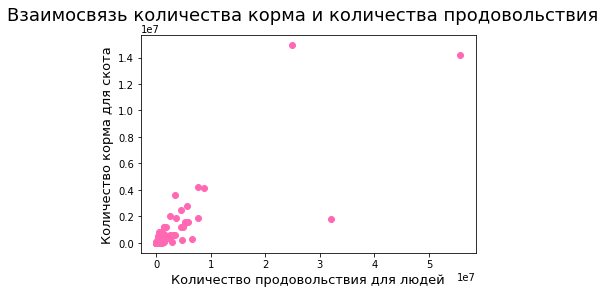

In [642]:
plt.scatter(b['total'],a['total'],color = 'hotpink')#строим коррел модель
#plt.xlim(0, 20000000);
plt.ylabel('Количество корма для скота',fontsize=13)
plt.xlabel('Количество продовольствия для людей', fontsize=13)
plt.suptitle('Взаимосвязь количества корма и количества продовольствия', fontsize=18)

In [ ]:
#На графике видны ярко выраженные выбросы, от них стоит избавиться


In [527]:
iq = iqr(a['total'])
a1 = a[a.total <= 
(np.percentile(a['total'],75)+(3*iq))]#вычисляем наблюдения, которые не являются выбросами.

a1.set_index('index',inplace=True)#возвращаем индекс из столбца на место

In [584]:
ii = iqr(b['total'])
b1 = b[b.total >= 
       (np.percentile(b['total'],75)+(3*ii))]#вычисляем наблюдения, являются выбросами

b1.set_index('index',inplace=True)  


In [644]:
m = b1.index
o = a1.index
z = m & o

In [532]:
a2 = a1.drop([51,75,120])# убираем все точки переменной а, которые пересекаются с выбросами переменной b


,Area,Element,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total
index,,,,,,,,,,,,,,,,,,,,,
1,Afghanistan,Feed,20,27169,55210,339.40,677.10,720.0,720.0,736.0,...,1184.0,1342.0,1392.0,1294.0,1616.0,1388.0,1192.0,1522,1536,38034.0
2,Albania,Feed,75,67296,138025,1028.75,504.25,94.0,108.0,124.0,...,994.0,1047.0,959.0,1075.0,1134.0,1334.0,1334.0,1312,1319,27041.0
3,Algeria,Feed,88,58945,121462,616.66,36.52,83.0,94.0,63.0,...,4401.0,4599.0,4252.0,3436.0,4839.0,5804.0,7477.0,8549,8706,112193.0
4,Angola,Feed,105,41346,82815,-168.00,268.05,118.0,118.0,116.0,...,9814.0,10004.0,10112.0,10274.0,12520.0,12408.0,13118.0,10096,18518,114884.0
5,Antigua and Barbuda,Feed,104,35632,71773,221.78,-803.40,2.0,2.0,2.0,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Venezuela (Bolivarian Republic of),Feed,5192,59274,121462,141.24,-1464.98,360.0,291.0,321.0,...,1570.0,2580.0,4006.0,4240.0,4127.0,4177.0,4042.0,4647,5756,113987.0
171,Viet Nam,Feed,3792,43428,88336,224.96,1732.48,2104.0,2512.0,2614.0,...,20009.0,21500.0,21892.0,20362.0,20612.0,23026.0,21533.0,22210,22712,423004.0
172,Yemen,Feed,3237,34896,71773,202.15,630.76,167.0,168.0,172.0,...,159.0,219.0,409.0,216.0,470.0,326.0,346.0,442,420,10484.0


In [534]:
iq = iqr(a['total'])

a3 = a[a.total >= 
       (np.percentile(a['total'],75)+(3*iq))]#Проделываем те же манипуляции, но для переменой b

a3.set_index('index',inplace=True)


In [536]:
ii = iqr(b['total'])
b3 = b[b.total <= 
       (np.percentile(b['total'],75)+(3*ii))]
b3.set_index('index',inplace=True)

In [539]:
a3.index & b3.index

Int64Index([29, 112, 129, 162], dtype='int64', name='index')

In [541]:
b4 = b3.drop([29,112,129,162])

In [575]:
y =  b4.merge(a2, how = 'outer')
y.drop_duplicates(subset =["Area"],
                     keep = False, inplace = True)#проверка правильности рассчетов

In [578]:
scipy.stats.pearsonr(b4['total'],a2['total'])#Смотрим наличие корреляции и значимость новой модели

(0.6722494526761718, 2.4864353311675676e-21)

In [ ]:
#Значимость как и сила связи упала, это значит, что некоторые удаленные выбросы не портили модель


In [ ]:
#Поэтому было решено убрать только 3 очевидных выброса.

In [595]:
b1.total.sort_values()

index
125     3423089.0
51      3454666.0
145     3598646.0
130     4510896.0
159     4533281.0
120     4708853.0
104     4962218.0
117     5263343.0
164     5333140.0
57      5690851.0
80      5826883.0
75      6505006.0
82      7600442.0
62      7659431.0
22      8766344.0
166    24942372.0
74     32131053.0
36     55769675.0
Name: total, dtype: float64

In [603]:
b5 = b.drop([36,74,166])

In [604]:
a5 = a.drop([36,74,166])

In [612]:
scipy.stats.pearsonr(b5['total'],a5['total'])#Смотрим наличие корреляции и значимость для самой новой модели

(0.8180944586259153, 1.8529985976724902e-42)

Text(0.5, 0.98, 'Взаимосвязь количества корма и количества продовольствия')

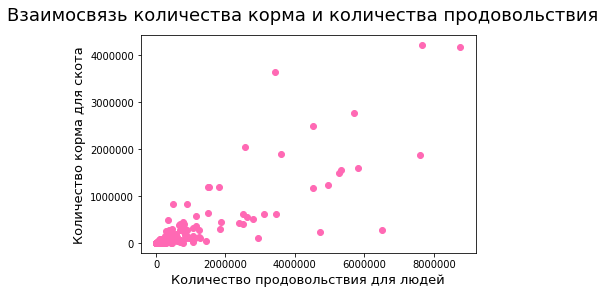

In [646]:
plt.scatter(b5['total'],a5['total'],color = 'hotpink')#строим коррел модель
#plt.xlim(0, 20000000);
plt.ylabel('Количество корма для скота',fontsize=13)
plt.xlabel('Количество продовольствия для людей', fontsize=13)
plt.suptitle('Взаимосвязь количества корма и количества продовольствия', fontsize=18)

In [ ]:
# убрав 3 выброса, модель не стала сущетсвенно качественней. Тем не менее результат анализа показал,
#что есть сильная линейная связь между количеством корма для скота и количеством продовольствия для людей.
#Можно сделать вывод, что увеличивая количество корма для скота, количество человеческой еды также вырастет